In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [9]:
def simulate(S_0, E_0, I_0, R_0, N, beta, alpha, gamma, t_max=70, dt=0.01, nc=3):

  k_max = np.int(np.ceil(t_max/dt))

  # for each SEIR compartment, initialize list of community history vectors
  S = [np.zeros(k_max), np.zeros(k_max), np.zeros(k_max)]
  E = [np.zeros(k_max), np.zeros(k_max), np.zeros(k_max)]
  I = [np.zeros(k_max), np.zeros(k_max), np.zeros(k_max)]
  R = [np.zeros(k_max), np.zeros(k_max), np.zeros(k_max)]

  # set initial conditions
  for c in range(nc):

    S[c][0] = S_0[c]
    E[c][0] = E_0[c]
    I[c][0] = I_0[c]
    R[c][0] = R_0[c]

  ## iterate SEIR cross-community contact model
  # iterate forward (explicit) in time
  for k in range(k_max-1):

    # iterate over communities
    for i in range(nc):

      ### accounting for N values since the infectious person makes contact with S/N other individuals (so N should be same community as S)
      S[i][k+1] = S[i][k] + dt*(-np.sum([beta[i,j]*S[i][k]*I[j][k]/N[i] for j in range(nc)])) 
      E[i][k+1] = E[i][k] + dt*( np.sum([beta[i,j]*S[i][k]*I[j][k]/N[i] for j in range(nc)]) - alpha[i]*E[i][k])
      I[i][k+1] = I[i][k] + dt*(                                                               alpha[i]*E[i][k]  - gamma[i]*I[i][k]) 
      R[i][k+1] = R[i][k] + dt*(                                                                                   gamma[i]*I[i][k]) 

  return (S, E, I, R)

In [10]:
def plot(SEIRs, plot_S=True, t_max=70, dt=0.01, nc=3):

  c_strings   = ["Students",    "Faculty & Staff", "Community"]
  SEIR_labels = ["Susceptible", "Exposed", "Infected", "Recovered"]
  SEIR_colors = ['gold',        'orange',  'red',      'gray']
 
  t = np.arange(0, t_max, dt)

  plt.figure(figsize=(15,5))
  
  # subplot for each community
  for c in range(nc):

    plt.subplot(1, 3, c+1)
    plt.title(c_strings[c])
    plt.xlabel("Days")
    plt.ylabel("Individuals")
    
    # plot each SEIR curve
    for (i, SEIR) in enumerate(SEIRs):

      if i == 0 and plot_S == False:
        continue

      plt.plot(t, SEIR[c], label=SEIR_labels[i], lw=2, c=SEIR_colors[i])
      plt.scatter(t[0], SEIR[c][0], label=None, c=SEIR_colors[i], s=25)  # initial condition marker
    
    plt.legend()
    plt.grid()

  plt.show()

  plt.savefig("SEIR.png")

0.24749999999999997


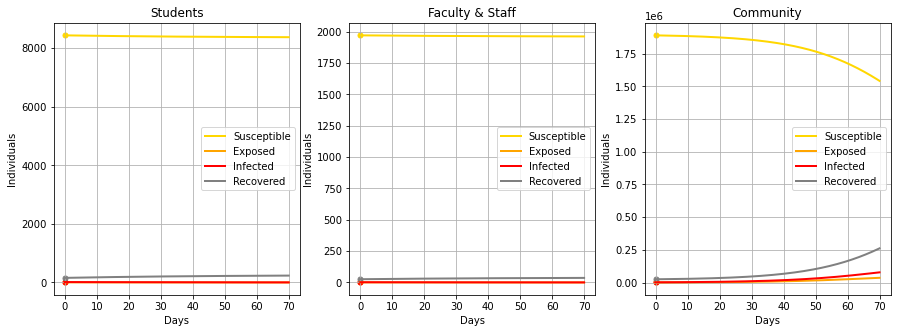

<Figure size 432x288 with 0 Axes>

In [55]:
reproduction_number = 1.65
beta_ii = reproduction_number*0.15 # estimated from R0 * gamma
print(beta_ii)

# students
beta_11 = beta_ii * 1    
beta_12 = beta_11/10 * 1
beta_13 = beta_11/15 * 1

# faculty/staff/workers
beta_21 = beta_12 # KEEP SAME (SYMMETRY)
beta_22 = beta_ii * 1  
beta_23 = beta_ii/15 * 1

# santa clara county
beta_31 = beta_13 # KEEP SAME (SYMMETRY)
beta_32 = beta_23 # KEEP SAME (SYMMETRY)
beta_33 = beta_ii * 1

beta = np.array([[beta_11, beta_12, beta_13],
                 [beta_21, beta_22, beta_23],
                 [beta_31, beta_32, beta_33]])

alpha_i = 0.4 # from hw2
alpha = [alpha_i, alpha_i, alpha_i]

gamma_i = 0.15 # from hw2
gamma = [gamma_i, gamma_i, gamma_i]

# initial conditions
N   = np.array([ 8613, 2000, 1.928E6 - 8613  - 2000])
E_0 = np.array([  5.3,    .7,     702 - 5.3   - 0])
I_0 = np.array([ 13.9,    1.87,    1825 - 13.9  - 5]) # start at 11/11, week before 11/11 is infectious, cumulative at 2 weeks before is recovered
R_0 = np.array([157.1,   25.85,   25118 - 157.1 - 30])
S_0 = N - E_0 - I_0 - R_0

# simulate
SEIR_histories = simulate(S_0, E_0, I_0, R_0, N, beta, alpha, gamma)
plot(SEIR_histories)